# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

In [3]:
type(type_ID)

pandas.core.series.Series

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# Adaboost

### Default

In [16]:
time1_ada_0 = datetime.datetime.now()
# Create adaboost tree classifier object
ada_0 = AdaBoostClassifier(random_state=None)
# Train model
model = ada_0.fit(X_train, y_train)
y_pred_ada_0 = ada_0.predict(X_test)
y_probs_ada_0 = ada_0.predict_proba(X_test)[:, 1]
time2_ada_0 = datetime.datetime.now()
print_score(y_test,y_pred_ada_0,time1_ada_0,time2_ada_0)

comfusion matrix = 
[[2797   83]
 [  81 4132]]

accuracy_score =  0.976878612716763

completeness =  0.9807737953952054
contamination =  0.019691577698695135

precision score =  0.9803084223013049
recall score =  0.9807737953952054

F1 score =  0.9805410536307546

time span=  0:00:06.470016


### Depth

In [17]:
time1_ada_1 = datetime.datetime.now()
ada_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500,random_state=None, learning_rate=0.1)
ada_1.fit(X_train, y_train)

errors_1 = [mean_squared_error(y_test, y_pred_ada_1)
          for y_pred_ada_1 in ada_1.staged_predict(X_test)]
bst_n_estimators_1 = np.argmin(errors_1)

ada_best_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=bst_n_estimators_1,learning_rate=0.1,random_state=None)
model_ada_1 = ada_best_1.fit(X_train, y_train)
y_pred_ada_best_1 = ada_best_1.predict(X_test)
y_probs_ada_best_1 = ada_best_1.predict_proba(X_test)[:, 1]
time2_ada_1 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_1,time1_ada_1 ,time2_ada_1 )

comfusion matrix = 
[[2804   76]
 [  75 4138]]

accuracy_score =  0.978711405611166

completeness =  0.9821979586992642
contamination =  0.018035121025154248

precision score =  0.9819648789748457
recall score =  0.9821979586992642

F1 score =  0.9820814050077132

time span=  0:02:04.688589


453


<IPython.core.display.Javascript object>


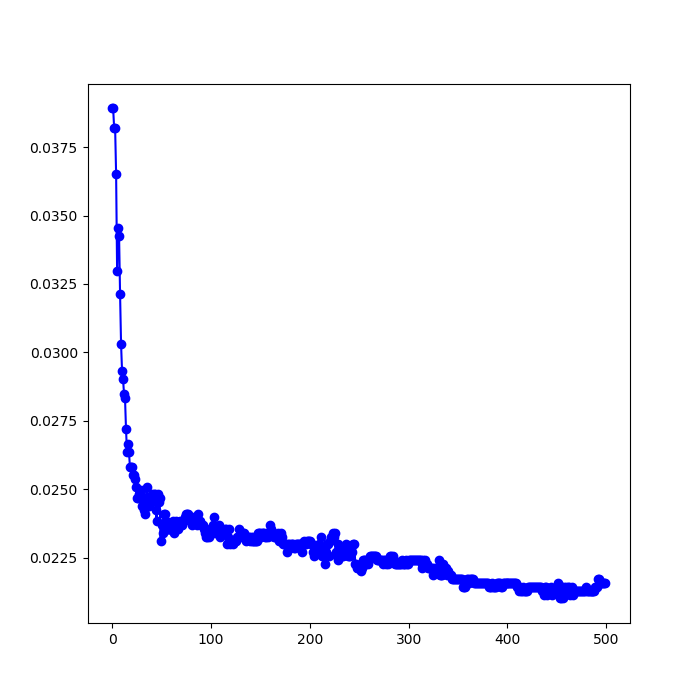

In [39]:
print(bst_n_estimators_1)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_1, "bo-")
plt.show()

In [19]:
time1_ada_2 = datetime.datetime.now()
ada_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500,random_state=None, learning_rate=0.1)
ada_2.fit(X_train, y_train)

errors_2 = [mean_squared_error(y_test, y_pred_ada_2)
          for y_pred_ada_2 in ada_2.staged_predict(X_test)]
bst_n_estimators_2 = np.argmin(errors_2)

ada_best_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=bst_n_estimators_2,learning_rate=0.1,random_state=None)
model_ada_2 = ada_best_2.fit(X_train, y_train)
y_pred_ada_best_2 = ada_best_2.predict(X_test)
y_probs_ada_best_2 = ada_best_2.predict_proba(X_test)[:, 1]
time2_ada_2 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_2,time1_ada_2 ,time2_ada_2 )

comfusion matrix = 
[[2827   53]
 [  58 4155]]

accuracy_score =  0.9843507683631749

completeness =  0.9862330880607643
contamination =  0.012595057034220532

precision score =  0.9874049429657795
recall score =  0.9862330880607643

F1 score =  0.9868186676166726

time span=  0:05:35.982316


482


<IPython.core.display.Javascript object>


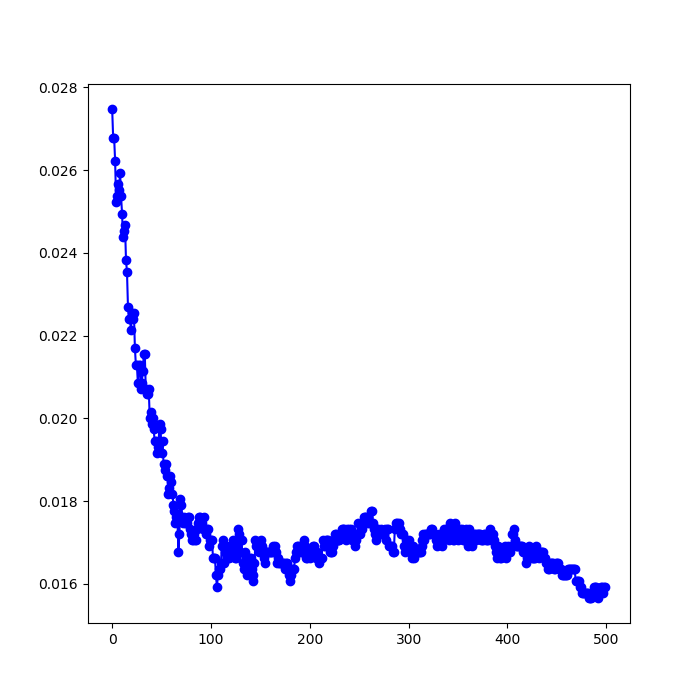

In [40]:
print(bst_n_estimators_2)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_2, "bo-")
plt.show()

In [21]:
time1_ada_3 = datetime.datetime.now()
ada_3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500,random_state=None, learning_rate=0.1)
ada_3.fit(X_train, y_train)

errors_3 = [mean_squared_error(y_test, y_pred_ada_3)
          for y_pred_ada_3 in ada_3.staged_predict(X_test)]
bst_n_estimators_3 = np.argmin(errors_3)

ada_best_3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=bst_n_estimators_3,learning_rate=0.1,random_state=None)
model_ada_3 = ada_best_3.fit(X_train, y_train)
y_pred_ada_best_3 = ada_best_3.predict(X_test)
y_probs_ada_best_3 = ada_best_3.predict_proba(X_test)[:, 1]
time2_ada_3 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_3,time1_ada_3 ,time2_ada_3)

comfusion matrix = 
[[2813   67]
 [  58 4155]]

accuracy_score =  0.9823769913999718

completeness =  0.9862330880607643
contamination =  0.01586925627664614

precision score =  0.9841307437233539
recall score =  0.9862330880607643

F1 score =  0.985180794309425

time span=  0:08:43.356603


460


<IPython.core.display.Javascript object>


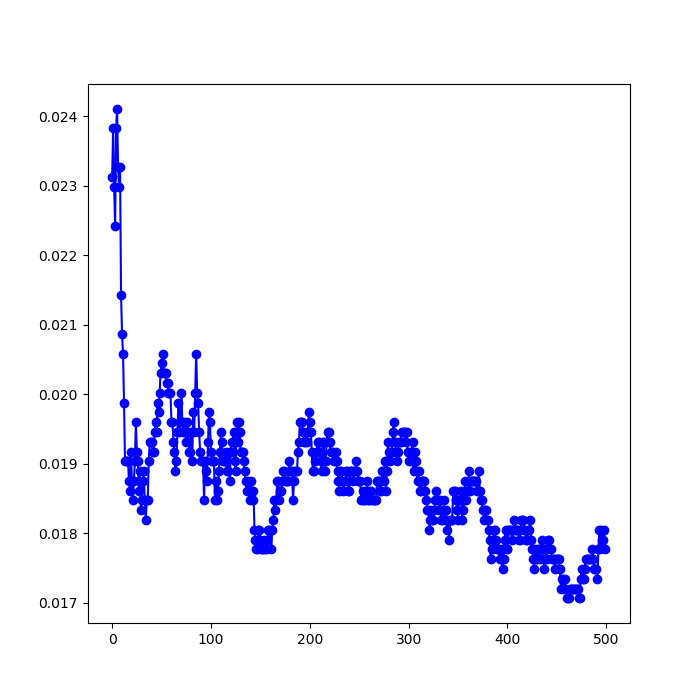

In [41]:
print(bst_n_estimators_3)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_3, "bo-")
plt.show()

In [23]:
time1_ada_4 = datetime.datetime.now()
ada_4 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500,random_state=None, learning_rate=0.5)
ada_4.fit(X_train, y_train)

errors_4 = [mean_squared_error(y_test, y_pred_ada_4)
          for y_pred_ada_4 in ada_4.staged_predict(X_test)]
bst_n_estimators_4 = np.argmin(errors_4)

ada_best_4 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=bst_n_estimators_4,learning_rate=0.5,random_state=None)
model_ada_4 = ada_best_4.fit(X_train, y_train)
y_pred_ada_best_4 = ada_best_4.predict(X_test)
y_probs_ada_best_4 = ada_best_4.predict_proba(X_test)[:, 1]
time2_ada_4 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_4,time1_ada_4 ,time2_ada_4)

comfusion matrix = 
[[2803   77]
 [  59 4154]]

accuracy_score =  0.9808261666431694

completeness =  0.9859957275100878
contamination =  0.01819900732687308

precision score =  0.9818009926731269
recall score =  0.9859957275100878

F1 score =  0.9838938891520606

time span=  0:07:42.553351


360


<IPython.core.display.Javascript object>


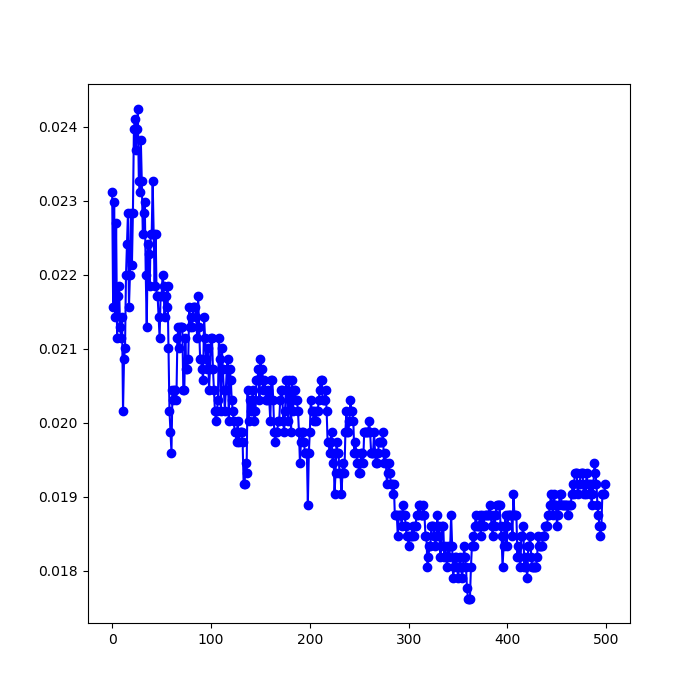

In [42]:
print(bst_n_estimators_4)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_4, "bo-")
plt.show()

In [25]:
time1_ada_5 = datetime.datetime.now()
ada_5 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500,random_state=None, learning_rate=0.75)
ada_5.fit(X_train, y_train)

errors_5 = [mean_squared_error(y_test, y_pred_ada_5)
          for y_pred_ada_5 in ada_5.staged_predict(X_test)]
bst_n_estimators_5 = np.argmin(errors_5)

ada_best_5 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=bst_n_estimators_5,learning_rate=0.75,random_state=None)
model_ada_5 = ada_best_5.fit(X_train, y_train)
y_pred_ada_best_5 = ada_best_5.predict(X_test)
y_probs_ada_best_5 = ada_best_5.predict_proba(X_test)[:, 1]
time2_ada_5 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_5,time1_ada_5 ,time2_ada_5)

comfusion matrix = 
[[2812   68]
 [  67 4146]]

accuracy_score =  0.9809671507119695

completeness =  0.984096843104676
contamination =  0.01613668723303275

precision score =  0.9838633127669673
recall score =  0.984096843104676

F1 score =  0.9839800640797437

time span=  0:07:54.690807


411


<IPython.core.display.Javascript object>


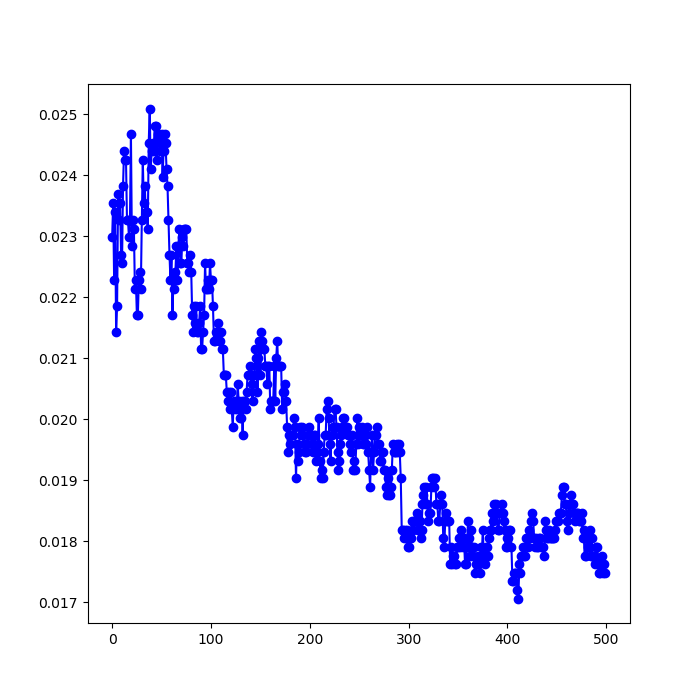

In [43]:
print(bst_n_estimators_5)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_5, "bo-")
plt.show()

In [27]:
time1_ada_6 = datetime.datetime.now()
ada_6 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500,random_state=None, learning_rate=0.5)
ada_6.fit(X_train, y_train)

errors_6 = [mean_squared_error(y_test, y_pred_ada_6)
          for y_pred_ada_6 in ada_6.staged_predict(X_test)]
bst_n_estimators_6 = np.argmin(errors_6)

ada_best_6 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=bst_n_estimators_6,learning_rate=0.5,random_state=None)
model_ada_6 = ada_best_6.fit(X_train, y_train)
y_pred_ada_best_6 = ada_best_6.predict(X_test)
y_probs_ada_best_6 = ada_best_6.predict_proba(X_test)[:, 1]
time2_ada_6 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_6,time1_ada_6 ,time2_ada_6)

comfusion matrix = 
[[2819   61]
 [  61 4152]]

accuracy_score =  0.9827999436063725

completeness =  0.9855210064087349
contamination =  0.014478993591265131

precision score =  0.9855210064087349
recall score =  0.9855210064087349

F1 score =  0.9855210064087349

time span=  0:02:59.716608


48


<IPython.core.display.Javascript object>


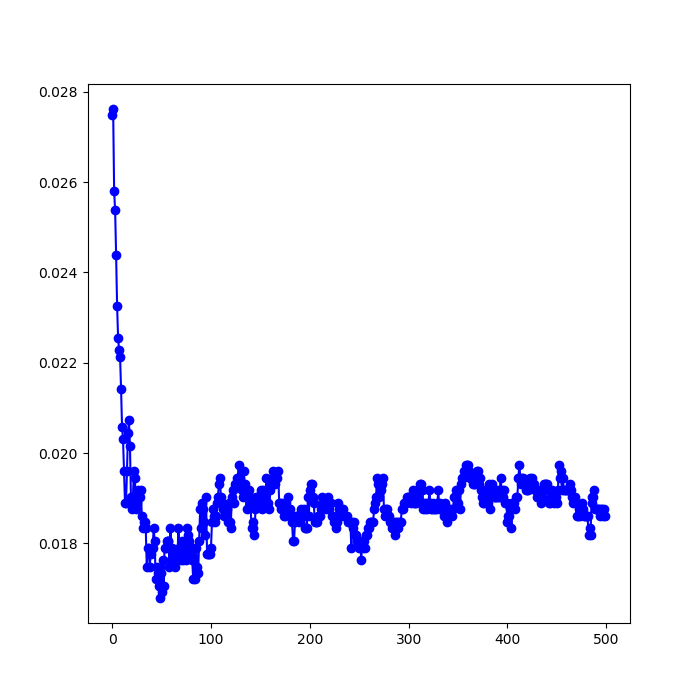

In [44]:
print(bst_n_estimators_6)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_6, "bo-")
plt.show()

In [29]:
time1_ada_7 = datetime.datetime.now()
ada_7 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=500,random_state=None, learning_rate=0.75)
ada_7.fit(X_train, y_train)

errors_7 = [mean_squared_error(y_test, y_pred_ada_7)
          for y_pred_ada_7 in ada_7.staged_predict(X_test)]
bst_n_estimators_7 = np.argmin(errors_7)

ada_best_7 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=bst_n_estimators_7,learning_rate=0.75,random_state=None)
model_ada_7 = ada_best_7.fit(X_train, y_train)
y_pred_ada_best_7 = ada_best_7.predict(X_test)
y_probs_ada_best_7 = ada_best_7.predict_proba(X_test)[:, 1]
time2_ada_7 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_7,time1_ada_7 ,time2_ada_7)

comfusion matrix = 
[[2819   61]
 [  64 4149]]

accuracy_score =  0.9823769913999718

completeness =  0.9848089247567055
contamination =  0.014489311163895487

precision score =  0.9855106888361045
recall score =  0.9848089247567055

F1 score =  0.9851596818235784

time span=  0:05:34.598246


499


<IPython.core.display.Javascript object>


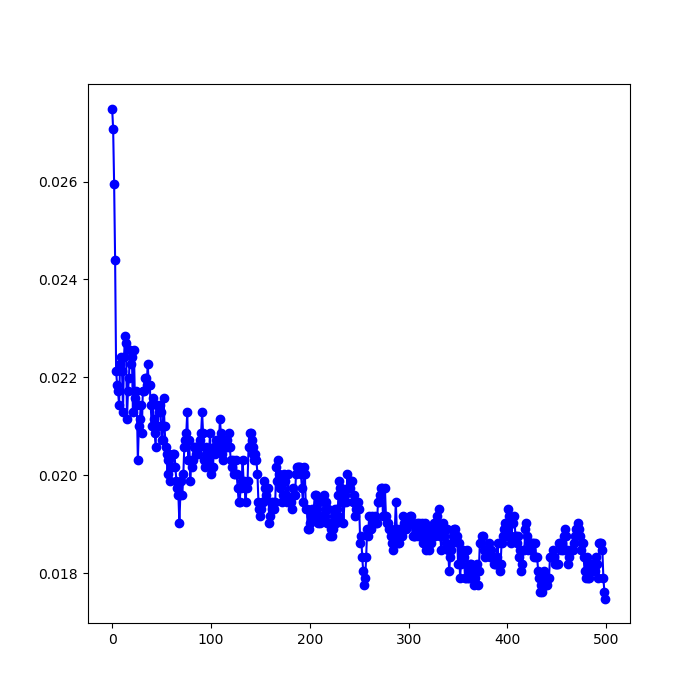

In [45]:
print(bst_n_estimators_7)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_7, "bo-")
plt.show()

In [31]:
time1_ada_8 = datetime.datetime.now()
ada_8 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500,random_state=None, learning_rate=0.5)
ada_8.fit(X_train, y_train)

errors_8 = [mean_squared_error(y_test, y_pred_ada_8)
          for y_pred_ada_8 in ada_8.staged_predict(X_test)]
bst_n_estimators_8 = np.argmin(errors_8)

ada_best_8 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=bst_n_estimators_8,learning_rate=0.5,random_state=None)
model_ada_8 = ada_best_8.fit(X_train, y_train)
y_pred_ada_best_8 = ada_best_8.predict(X_test)
y_probs_ada_best_8 = ada_best_8.predict_proba(X_test)[:, 1]
time2_ada_8 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_8,time1_ada_8 ,time2_ada_8)

comfusion matrix = 
[[2803   77]
 [  69 4144]]

accuracy_score =  0.979416325955167

completeness =  0.983622122003323
contamination =  0.01824212271973466

precision score =  0.9817578772802653
recall score =  0.983622122003323

F1 score =  0.9826891154849419

time span=  0:01:41.756527


302


<IPython.core.display.Javascript object>


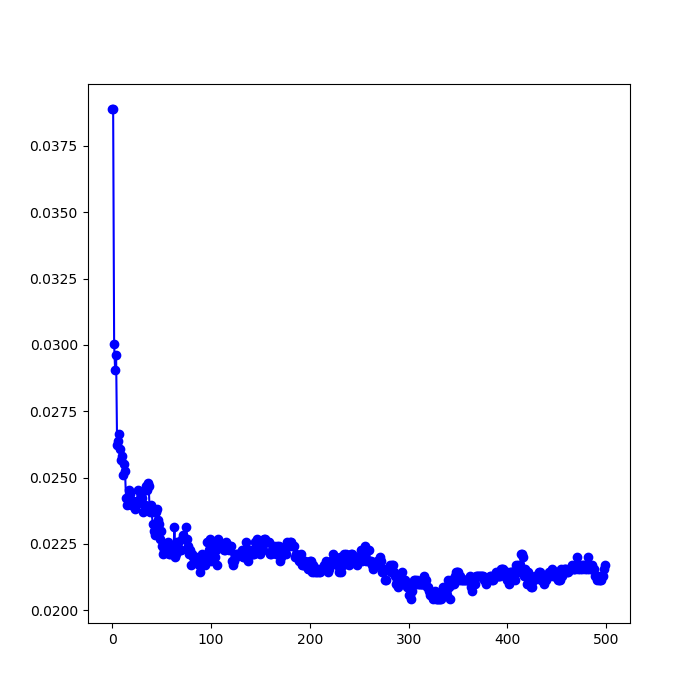

In [46]:
print(bst_n_estimators_8)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_8, "bo-")
plt.show()

In [33]:
time1_ada_9 = datetime.datetime.now()
ada_9 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500,random_state=None, learning_rate=0.75)
ada_9.fit(X_train, y_train)

errors_9 = [mean_squared_error(y_test, y_pred_ada_9)
          for y_pred_ada_9 in ada_9.staged_predict(X_test)]
bst_n_estimators_9 = np.argmin(errors_9)

ada_best_9 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=bst_n_estimators_9,learning_rate=0.75,random_state=None)
model_ada_9 = ada_best_9.fit(X_train, y_train)
y_pred_ada_best_9 = ada_best_9.predict(X_test)
y_probs_ada_best_9 = ada_best_9.predict_proba(X_test)[:, 1]
time2_ada_9 = datetime.datetime.now()
print_score(y_test,y_pred_ada_best_9,time1_ada_9 ,time2_ada_9)

comfusion matrix = 
[[2806   74]
 [  75 4138]]

accuracy_score =  0.9789933737487664

completeness =  0.9821979586992642
contamination =  0.017568850902184234

precision score =  0.9824311490978158
recall score =  0.9821979586992642

F1 score =  0.9823145400593472

time span=  0:01:44.104341


309


<IPython.core.display.Javascript object>


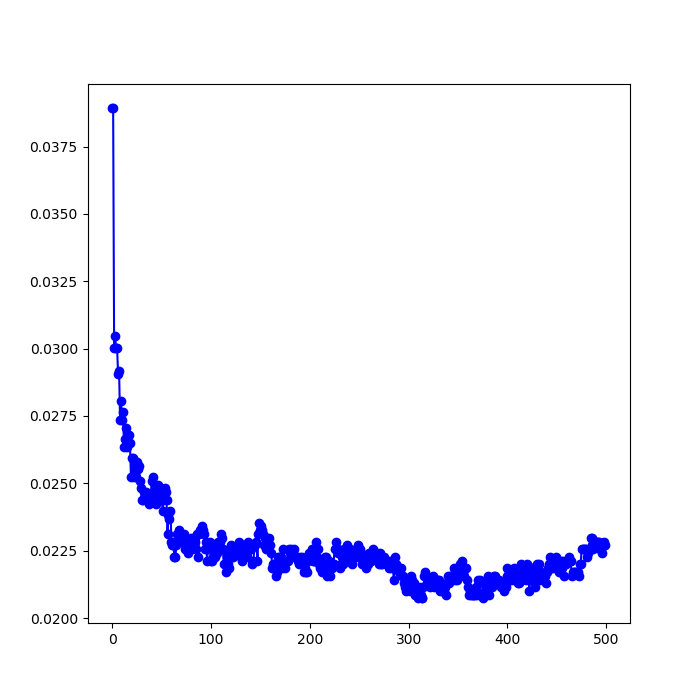

In [47]:
print(bst_n_estimators_9)
fig = plt.figure(figsize=(7, 7))
plt.plot(errors_9, "bo-")
plt.show()

In [36]:
time1_ada_samme_1 = datetime.datetime.now()
# Create adaboost tree classifier object
adaboost_samme_1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500,
                              random_state=None,algorithm="SAMME", learning_rate=0.5)
# Train model
model = adaboost_samme_1.fit(X_train, y_train)
y_pred_ada_samme_1 = adaboost_samme_1.predict(X_test)
y_probs_ada_samme_1 = adaboost_samme_1.predict_proba(X_test)[:, 1]
time2_ada_samme_1 = datetime.datetime.now()
print_score(y_test,y_pred_ada_samme_1,time1_ada_samme_1,time2_ada_samme_1)

comfusion matrix = 
[[2798   82]
 [  74 4139]]

accuracy_score =  0.9780064852671648

completeness =  0.9824353192499407
contamination =  0.019426676143094054

precision score =  0.980573323856906
recall score =  0.9824353192499407

F1 score =  0.9815034384633625

time span=  0:01:03.052213


In [37]:
time1_ada_samme_2 = datetime.datetime.now()
# Create adaboost tree classifier object
adaboost_samme_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500,
                              random_state=None,algorithm="SAMME.R", learning_rate=0.5)
# Train model
model = adaboost_samme_2.fit(X_train, y_train)
y_pred_ada_samme_2 = adaboost_samme_2.predict(X_test)
y_probs_ada_samme_2 = adaboost_samme_2.predict_proba(X_test)[:, 1]
time2_ada_samme_2 = datetime.datetime.now()
print_score(y_test,y_pred_ada_samme_2,time1_ada_samme_2,time2_ada_samme_2)

comfusion matrix = 
[[2801   79]
 [  75 4138]]

accuracy_score =  0.9782884534047652

completeness =  0.9821979586992642
contamination =  0.018733696940953285

precision score =  0.9812663030590467
recall score =  0.9821979586992642

F1 score =  0.9817319098457888

time span=  0:01:06.570212


## Feature Importance

<IPython.core.display.Javascript object>


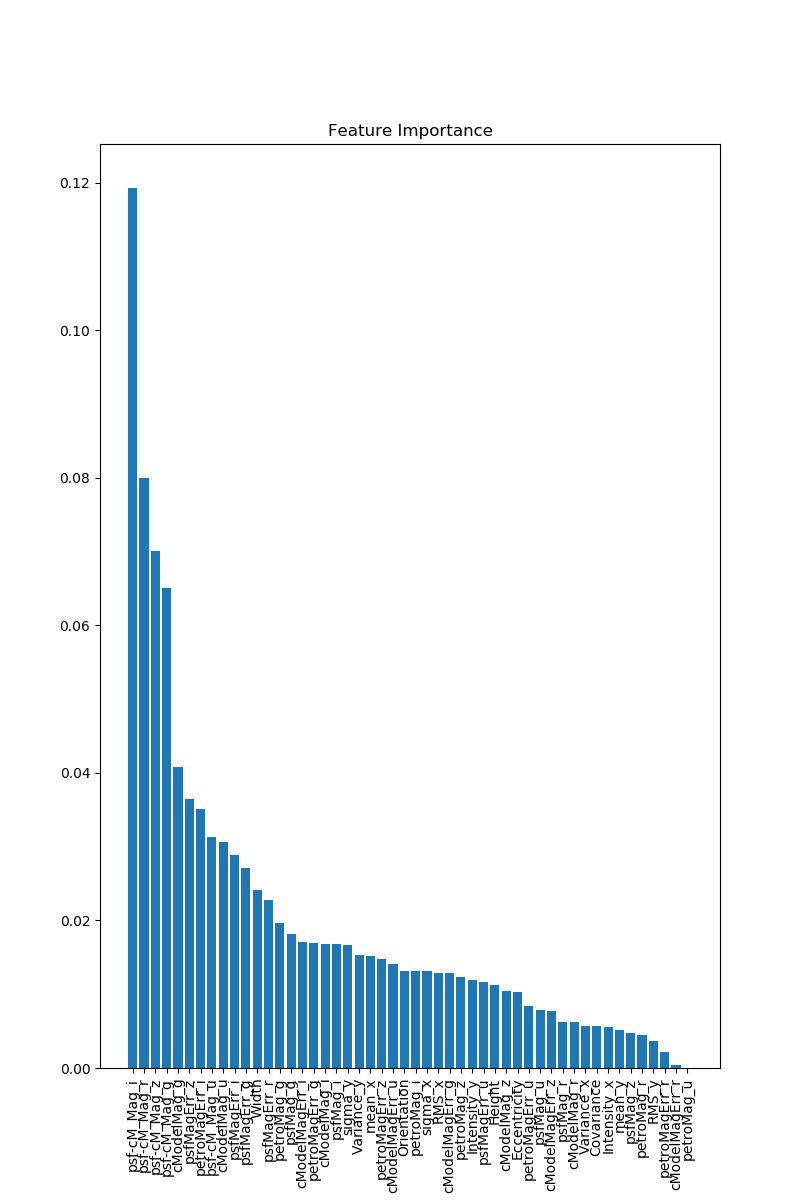

In [51]:
# Calculate feature importances
importances = model_ada_6.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,12))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

## Cross-validation

In [16]:
scores = cross_val_score(model_ada_6, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.96992481 0.97603383 0.97791353 0.96616541 0.97650376 0.97368421
 0.97556391 0.97838346 0.97601129 0.97224835]
Average cross-validation score: 0.97


,0
0,0.969925
1,0.976034
2,0.977914
3,0.966165
4,0.976504
5,0.973684
6,0.975564
7,0.978383
8,0.976011
9,0.972248


### Confusion Matrix

<IPython.core.display.Javascript object>


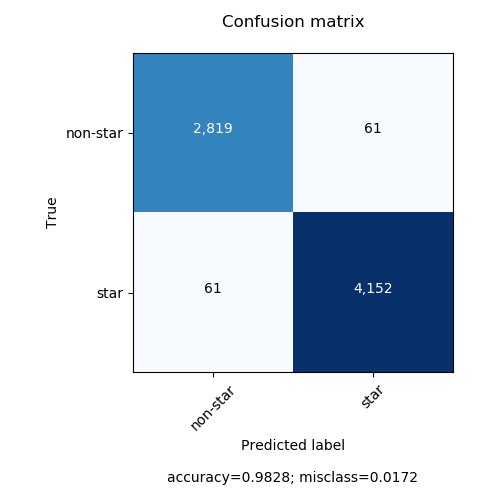

In [52]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_ada_best_6)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [48]:
score_ada_0 = score(y_test,y_pred_ada_0,time1_ada_0,time2_ada_0)
score_ada_1 = score(y_test,y_pred_ada_best_1,time1_ada_1 ,time2_ada_1)
score_ada_2 = score(y_test,y_pred_ada_best_2,time1_ada_2 ,time2_ada_2)
score_ada_3 = score(y_test,y_pred_ada_best_3,time1_ada_3 ,time2_ada_3)
score_ada_4 = score(y_test,y_pred_ada_best_4,time1_ada_4 ,time2_ada_4)
score_ada_5 = score(y_test,y_pred_ada_best_5,time1_ada_5 ,time2_ada_5)
score_ada_6 = score(y_test,y_pred_ada_best_6,time1_ada_6 ,time2_ada_6)
score_ada_7 = score(y_test,y_pred_ada_best_7,time1_ada_7 ,time2_ada_7)
score_ada_8 = score(y_test,y_pred_ada_best_8,time1_ada_8 ,time2_ada_8)
score_ada_9 = score(y_test,y_pred_ada_best_9,time1_ada_9 ,time2_ada_9)
score_samme_1 = score(y_test,y_pred_ada_samme_1,time1_ada_samme_1 ,time1_ada_samme_2)
score_samme_2 = score(y_test,y_pred_ada_samme_2,time1_ada_samme_2 ,time2_ada_samme_2)

In [56]:
m1_t = pd.DataFrame({
 'accuracy' : [score_ada_0[1],score_ada_1[1],score_ada_2 [1],score_ada_3[1],score_ada_4[1],score_ada_5[1],score_ada_6[1],score_ada_7[1],score_ada_8[1],score_ada_9[1],score_samme_1[1],score_samme_2[1]],
 'completeness' : [score_ada_0[2],score_ada_1[2],score_ada_2 [2],score_ada_3[2],score_ada_4[2],score_ada_5[2],score_ada_6[2],score_ada_7[2],score_ada_8[2],score_ada_9[2],score_samme_1[2],score_samme_2[2]],
 'contamination' : [score_ada_0[3],score_ada_1[3],score_ada_2 [3],score_ada_3[3],score_ada_4[3],score_ada_5[3],score_ada_6[3],score_ada_7[3],score_ada_8[3],score_ada_9[3],score_samme_1[3],score_samme_2[3]],
 'precision' : [score_ada_0[4],score_ada_1[4],score_ada_2 [4],score_ada_3[4],score_ada_4[4],score_ada_5[4],score_ada_6[4],score_ada_7[4],score_ada_8[4],score_ada_9[4],score_samme_1[4],score_samme_2[4]],
 'recall' : [score_ada_0[5],score_ada_1[5],score_ada_2 [5],score_ada_3[5],score_ada_4[5],score_ada_5[5],score_ada_6[5],score_ada_7[5],score_ada_8[5],score_ada_9[5],score_samme_1[5],score_samme_2[5]],
 'F1 score' : [score_ada_0[6],score_ada_1[6],score_ada_2 [6],score_ada_3[6],score_ada_4[6],score_ada_5[6],score_ada_6[6],score_ada_7[6],score_ada_8[6],score_ada_9[6],score_samme_1[6],score_samme_2[6]],
 'ROC AUC score' : [roc_auc_score(y_test, y_probs_ada_0),roc_auc_score(y_test, y_probs_ada_best_1),roc_auc_score(y_test, y_probs_ada_best_2),roc_auc_score(y_test, y_probs_ada_best_3),
                    roc_auc_score(y_test, y_probs_ada_best_4),roc_auc_score(y_test, y_probs_ada_best_5),roc_auc_score(y_test, y_probs_ada_best_6),roc_auc_score(y_test, y_probs_ada_best_7),
                    roc_auc_score(y_test, y_probs_ada_best_8),roc_auc_score(y_test, y_probs_ada_best_9),roc_auc_score(y_test, y_probs_ada_samme_1),roc_auc_score(y_test, y_probs_ada_samme_2)],
 'time span' : [score_ada_0[7],score_ada_1[7],score_ada_2 [7],score_ada_3[7],score_ada_4[7],score_ada_5[7],score_ada_6[7],score_ada_7[7],score_ada_8[7],score_ada_9[7],score_samme_1[7],score_samme_2[7]]
                })

m1_t.rename(index = {0: "ada_0", 
                     1: "ada_1",
                     2: "ada_2",
                     3: "ada_3",
                     4: "ada_4",
                     5: "ada_5",
                     6: "ada_6",
                     7: "ada_7",
                     8: "ada_8",
                     9: "ada_9",
                     10: "samme_1",
                     11: "samme_2"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,ROC AUC score,time span
ada_0,0.976879,0.980774,0.019692,0.980308,0.980774,0.980541,0.997421,00:00:06.470016
ada_1,0.978711,0.982198,0.018035,0.981965,0.982198,0.982081,0.997620,00:02:04.688589
ada_2,0.984351,0.986233,0.012595,0.987405,0.986233,0.986819,0.998085,00:05:35.982316
ada_3,0.982377,0.986233,0.015869,0.984131,0.986233,0.985181,0.997437,00:08:43.356603
ada_4,0.980826,0.985996,0.018199,0.981801,0.985996,0.983894,0.997920,00:07:42.553351
ada_5,0.980967,0.984097,0.016137,0.983863,0.984097,0.983980,0.998042,00:07:54.690807
ada_6,0.982800,0.985521,0.014479,0.985521,0.985521,0.985521,0.997108,00:02:59.716608
ada_7,0.982377,0.984809,0.014489,0.985511,0.984809,0.985160,0.998174,00:05:34.598246
ada_8,0.979416,0.983622,0.018242,0.981758,0.983622,0.982689,0.997853,00:01:41.756527
ada_9,0.978993,0.982198,0.017569,0.982431,0.982198,0.982315,0.997853,00:01:44.104341


<IPython.core.display.Javascript object>


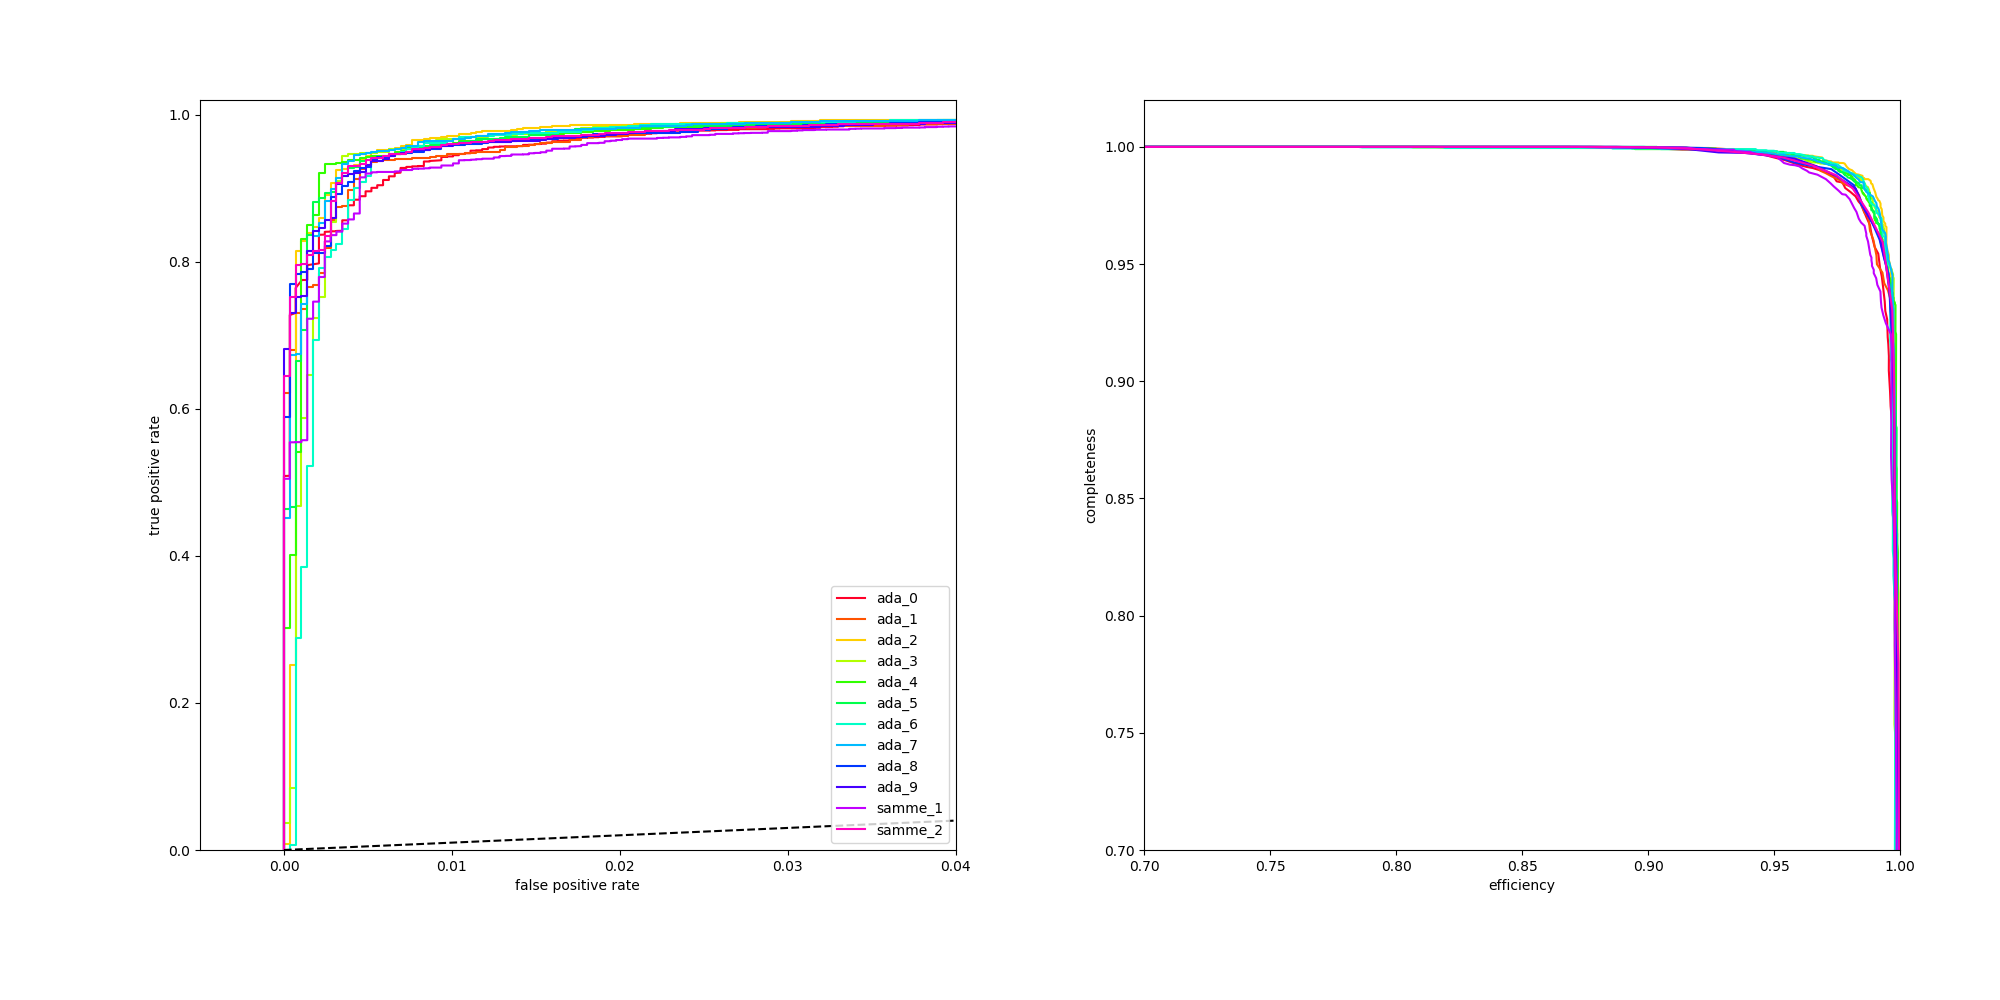

In [53]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_ada_0, y_probs_ada_best_1, y_probs_ada_best_2, y_probs_ada_best_3, y_probs_ada_best_4, y_probs_ada_best_5, y_probs_ada_best_6, y_probs_ada_best_7, y_probs_ada_best_8, y_probs_ada_best_9, y_probs_ada_samme_1, y_probs_ada_samme_2]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(-0.005, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()